In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from pathlib import Path

In [2]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X + bias

In [3]:
X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

Splitting Data into Training Set and Testing Set

In [4]:
train_split=int(0.8 * len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)


(40, 10, 40, 10)

Data Visualization

In [5]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10,8))

    #plot training data
    plt.scatter(train_data,train_labels,c="b",s=4,label="Traingin data")

    #plot test data

    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")

    #predictions
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    
    plt.legend(prop={"size":14})



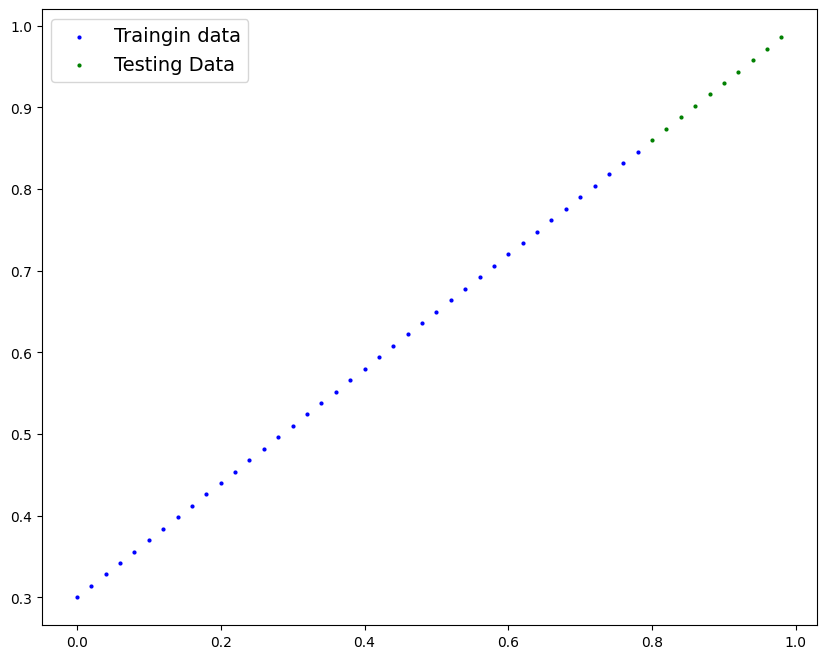

In [6]:
plot_prediction()

Build PyTorch Model

In [7]:
# Create linear regression model 

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
    #Forward method to define the computation in the model

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias  #linear regression formula


Checking the contents of PyTorch Model

In [8]:
#Create a random seed

torch.manual_seed(42)

#Create an object of the model class

model=LinearRegressionModel()
model

LinearRegressionModel()

In [9]:
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [10]:
model.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

Making Prediction using `torch.inference_mode()`

In [11]:
# y_pred=model(X_test)
# y_pred

In [12]:
with torch.inference_mode():
    y_preds=model(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

Visualization 

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

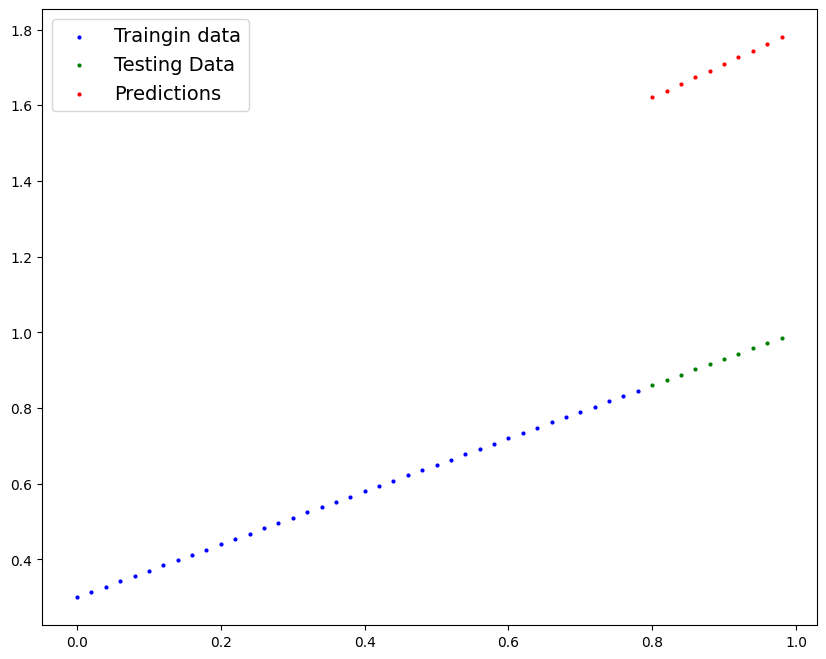

In [14]:
plot_prediction(predictions=y_preds)

Training a model with PyTorch

* Steup a loss function

In [15]:

loss_func=nn.L1Loss()
loss_func

L1Loss()

* Step an Optimizer

In [16]:
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Building a Training Loop

In [ ]:
epochs=200

#tracking different values
epoch_count=[]
loss_value=[]
test_loss_values=[]

#0. loop through the data

for epoch in range(epochs):

    #set the model to training mode
    model.train()
    
    #1.Forward pass

    y_pred=model(X_train)

    #2. Calculate the Loss

    loss=loss_func(y_pred,y_train)
    #print(f"loss : {loss}")
    
    #3. Optimizer zero grad

    optimizer.zero_grad()

    #4.back propogation
    loss.backward()

    #5. step the optimizer 
    optimizer.step()

    #testing loop
    model.eval() #turn off different settings in the model not needed for evaluation
    with torch.inference_mode(): #turn off gradient tracking
        #1. do the forward pass
        test_pred=model(X_test)

        #2.Calculate the loss
        test_loss=loss_func(test_pred,y_test)
    if epoch % 10==0:
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {epoch} | Loss:{loss} loss : {test_loss}")

        print(model.state_dict())



Epoch : 0 | Loss:0.6860889196395874 loss : 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch : 10 | Loss:0.5708791017532349 loss : 0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch : 20 | Loss:0.45566922426223755 loss : 0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch : 30 | Loss:0.34045934677124023 loss : 0.35962313413619995
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch : 40 | Loss:0.2252494841814041 loss : 0.2249133139848709
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch : 50 | Loss:0.1100396141409874 loss : 0.09020347893238068
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch : 60 | Loss:0.009724985808134079 loss : 0.020998019725084305
OrderedDict([('weights', tensor([0.6539])), ('bias', tensor([0.3200]))])
Epoch : 70 | Loss:0.006216754671186209 lo

model.state_dict()

In [18]:
model.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

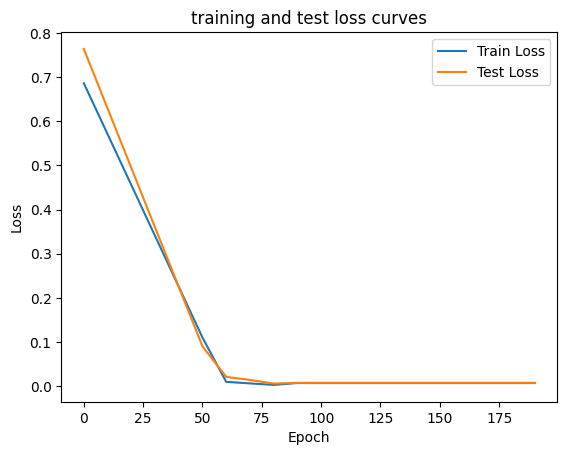

In [19]:
#plot the loss curves

plt.plot(epoch_count,np.array(torch.tensor(loss_value).numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [20]:
with torch.inference_mode():
    y_preds_new=model(X_test)

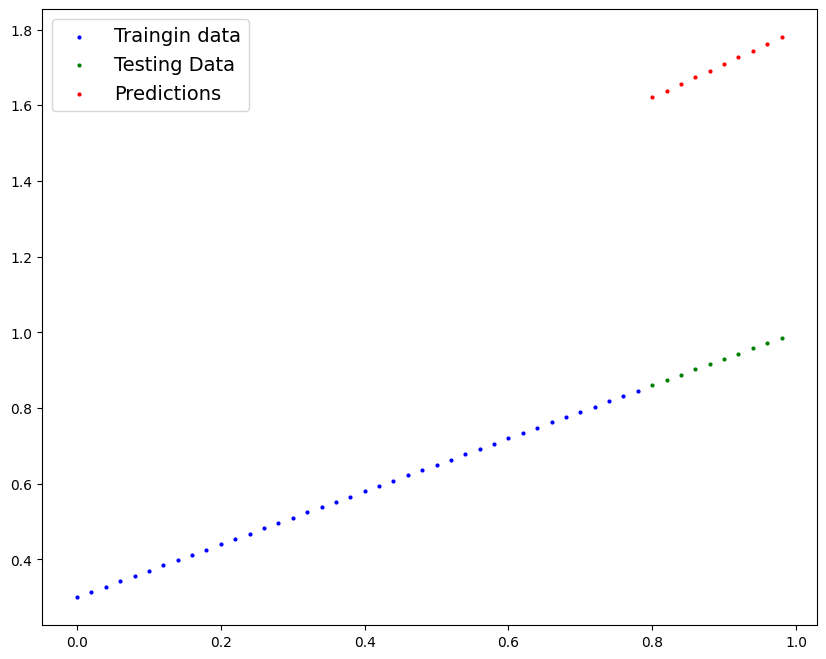

In [21]:
plot_prediction(predictions=y_preds)

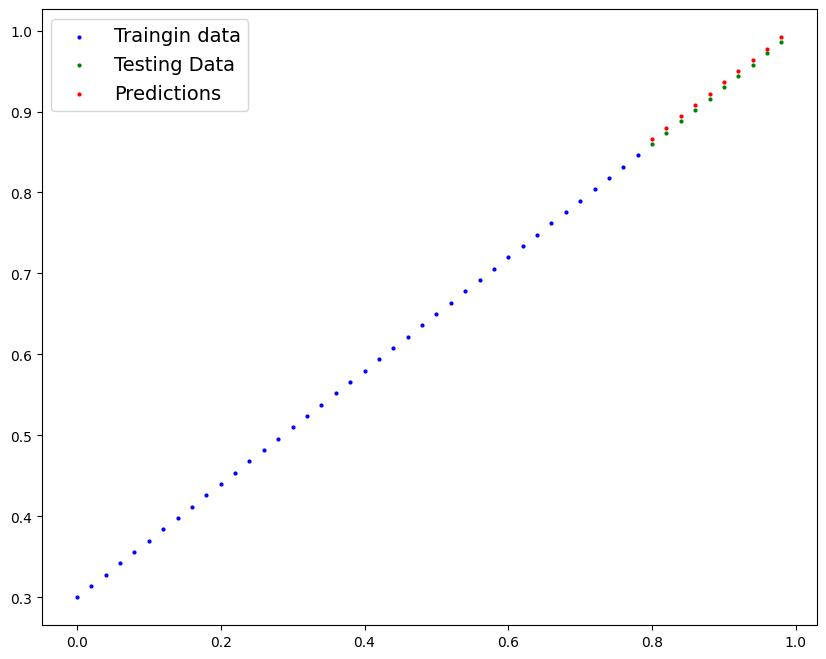

In [22]:
plot_prediction(predictions=y_preds_new)

# Saving a model in PyTorch

In [36]:
# create models dictory

Model_Path=Path("models")
Model_Path.mkdir(parents=True,exist_ok=True)

#Create model save path
Model_Name="01_Pythorch_workflow_model.pth"
Model_Save_Path=Model_Path / Model_Name

#Save the model State dict
print(f"Saving model to : {Model_Save_Path}")
torch.save(obj=model.state_dict(),f=Model_Save_Path)

Saving model to : models\01_Pythorch_workflow_model.pth


# Load the PyTorch Model

In [28]:
model.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [29]:
loaded_model=LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=Model_Save_Path))

C:\Users\email\AppData\Local\Temp\ipykernel_35992\2696437374.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=Model_Save_Path))


<All keys matched successfully>

In [30]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [31]:
#Make some prediction with loade Model

loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model(X_test)
loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [34]:
model.eval()
with torch.inference_mode():
    y_preds=model(X_test)
y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [35]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])